# Redes Neurais Convolucinais com TensorFlow: Classificando Imagens de Folhas de Videira

A Vinícola Vale das Uvas, especializada na produção de sucos de frutas de alta qualidade, enfrenta um desafio crucial: monitorar a saúde das folhas das videiras, essenciais para a qualidade das uvas. Localizada em uma região vinícola renomada, a empresa percebeu que variações na saúde das folhas afetam diretamente a qualidade da fruta, com folhas saudáveis resultando em uvas de melhor qualidade e folhas doentes comprometendo toda a produção.

Diante disso, a Vinícola precisa de uma solução rápida e precisa para identificar o estado de saúde das folhas. O objetivo deste projeto é desenvolver um modelo de rede neural convolucional capaz de classificar imagens de folhas, identificando se estão saudáveis ou doentes. Este modelo auxiliará a equipe de campo a tomar decisões informadas para otimizar a produção.

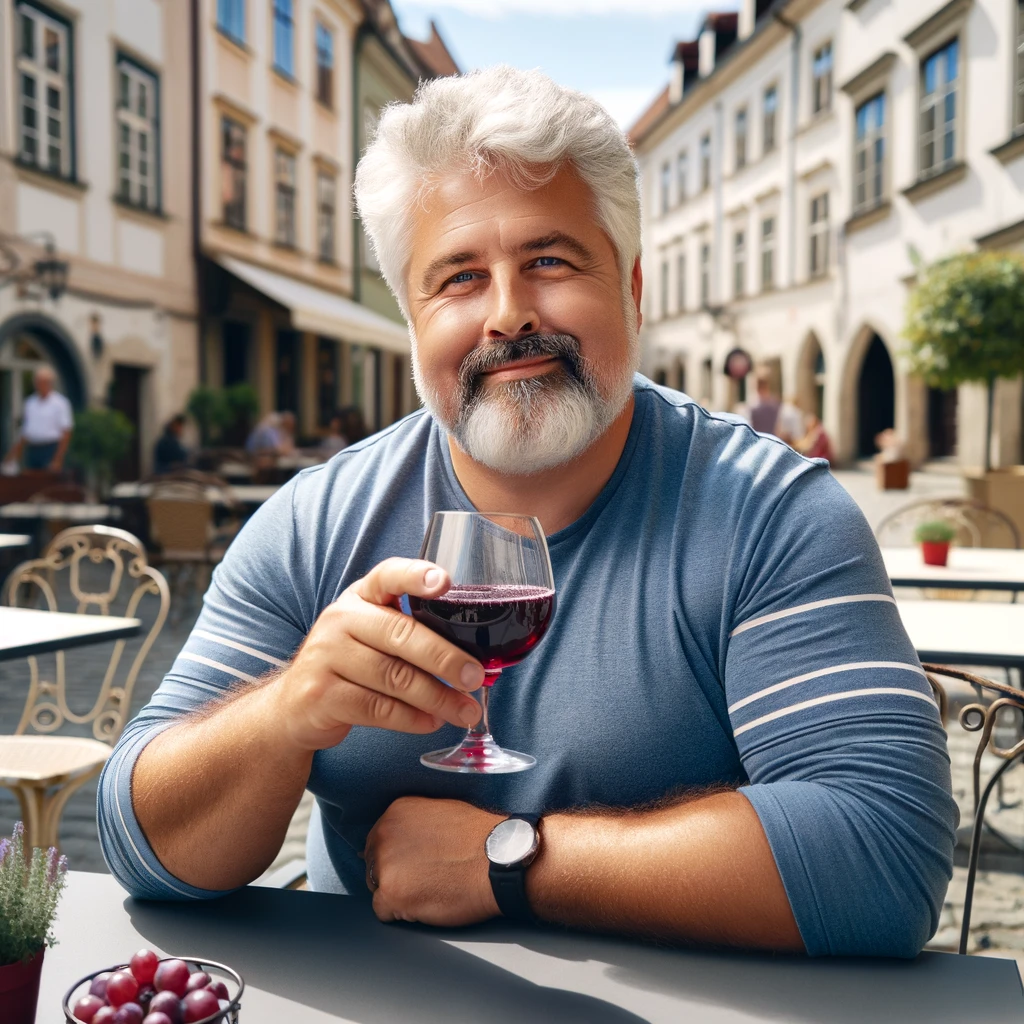

# Preparação de dados e visualização

### Carregando os dados

In [1]:
url = '/content/drive/MyDrive/Alura/Cursos/3773 - TensorFlow Keras: Classificando imagens com redes convolucionais/Projeto/uvas'

In [2]:
import pathlib

In [3]:
data_dir=pathlib.Path(url)

In [4]:
len(list(data_dir.glob('*/*.JPG')))

1600

In [5]:
# Lista todas as subpastas (e arquivos, se houver) no diretório especificado
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['LeafBlight', 'BlackRot', 'HealthyGrapes', 'BlackMeasles']

In [6]:
import PIL

In [7]:
leafblight = list(data_dir.glob('LeafBlight/*'))

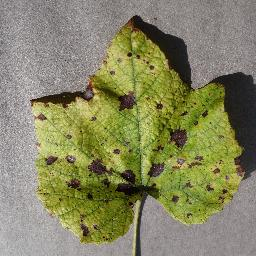

In [8]:
PIL.Image.open(str(leafblight[0]))

### Exploração e visualização de dados

Compreendendo as dimensões e canais de cores

In [9]:
import numpy as np

In [10]:
# Verificando o número de imagens por classe e obtendo informações de uma imagem exemplo
for subfolder in subfolders:
    path = data_dir / subfolder
    images = list(path.glob('*.JPG'))
    print(f"Classe '{subfolder}' tem {len(images)} imagens.")

    # Verificando as dimensões e canais de uma imagem exemplo
    if images:
        img = PIL.Image.open(str(images[0]))
        img_array = np.array(img)
        print(f"Dimensões da primeira imagem em '{subfolder}': {img_array.shape}")

Classe 'LeafBlight' tem 400 imagens.
Dimensões da primeira imagem em 'LeafBlight': (256, 256, 3)
Classe 'BlackRot' tem 400 imagens.
Dimensões da primeira imagem em 'BlackRot': (256, 256, 3)
Classe 'HealthyGrapes' tem 400 imagens.
Dimensões da primeira imagem em 'HealthyGrapes': (256, 256, 3)
Classe 'BlackMeasles' tem 400 imagens.
Dimensões da primeira imagem em 'BlackMeasles': (256, 256, 3)


- RGB (255,0,0) representa o vermelho puro.
- RGB (0,255,0) representa o verde puro.
- RGB (0,0,255) representa o verde puro.

- RGB (0, 0, 0) é preto porque não há luz sendo emitida.
- RGB (255, 255, 255) é branco porque todos os canais estão emitindo luz no máximo, combinando luz vermelha, verde e azul para criar luz branca.

### Carregando os dados com o Tensorflow

In [11]:
batch_size = 64
altura = 256
largura = 256

In [12]:
import tensorflow as tf

In [ ]:
# Carrega um conjunto de dados de imagens a partir de um diretório
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,                      # Diretório onde as imagens estão localizadas
    validation_split=0.2,          # Percentual de dados reservados para validação (20%)
    subset='training',             # Especifica que esse conjunto é o de treino (o restante será para validação)
    seed=568,                      # Semente para garantir a reprodutibilidade da divisão dos dados
    image_size=(altura, largura),  # Redimensiona as imagens para as dimensões especificadas
    batch_size=batch_size          # Define o número de imagens processadas por vez (tamanho do lote)
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [ ]:
# Carrega um conjunto de dados de imagens a partir de um diretório, mas agora para validação
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [15]:
treino.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

# Treinando e melhorando a rede

### Montando um perceptron de múltiplas camadas

In [16]:
tf.random.set_seed(42)

In [ ]:
# Cria um modelo sequencial no Keras (uma pilha linear de camadas)
modelo = tf.keras.models.Sequential([
    # Camada de entrada, que especifica a forma das imagens de entrada (256x256x3, ou seja, imagens RGB de 256x256 pixels)
    tf.keras.layers.Input(shape=(256, 256, 3)),
    
    # Camada de normalização, que escala os valores dos pixels das imagens de 0-255 para 0-1 (rescaling)
    tf.keras.layers.Rescaling(1./255),
    
    # Camada de "flatten", que transforma a imagem (matriz 2D) em um vetor unidimensional
    tf.keras.layers.Flatten(),
    
    # Camada densa com 128 unidades e ativação ReLU (rectified linear unit), usada para aprendizado não-linear
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    # Camada de saída densa com 4 unidades e ativação softmax, usada para classificação multiclasse (4 categorias possíveis)
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

- [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): Define uma sequência de camadas na rede neural;
- [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling): Camada de processamento que reescala os valores de entrada para um novo intervalo;
- [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): O método Flatten pega a matriz tridimensional das imagens que tinha o tamanho de 256x256x3 originalmente e passa para o formato de um array unidimensinal com 196608 valores neste caso; Isso porque o resultado da multiplicação 256x256x3 é igual 196608;
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): Adiciona uma camada de neurônios;
- [ReLU](https://www.tensorflow.org/api_docs/python/tf/nn/relu): Função de ativação que realiza o seguinte processo na saída de cada neurônio:

        Se x > 0: retorna x;
        Do contrário: retorna 0;

    Em outras palavras, apenas passa valores maiores que zero para próxima camada.

- [Softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax): Função de ativação que pega uma lista de valores e os dimensiona para que a soma de todos os elementos seja igual a 1. Quando aplicado aos resultados do modelo, você pode pensar nos valores dimensionados como a probabilidade para aquela classe. Por exemplo, em seu modelo de classificação que possui 4 unidades na camada densa de saída, ter o valor mais alto no índice = 3 significa que o modelo está mais confiante de que a imagem de entrada seja da classe LeafBlight.

In [18]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Treinando o modelo

In [ ]:
# Obtém o nome do dispositivo GPU disponível (se houver) usando TensorFlow
device_name = tf.test.gpu_device_name()

# Verifica se o dispositivo GPU encontrado é o esperado (GPU 0), caso contrário, gera um erro
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')  # Se não encontrar a GPU esperada, lança um erro

# Se a GPU foi encontrada, imprime o nome do dispositivo
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [20]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
20/20 [==============================] - 177s 6s/step - loss: 67.9668 - accuracy: 0.2797 - val_loss: 10.6422 - val_accuracy: 0.4156
Epoch 2/10
20/20 [==============================] - 6s 239ms/step - loss: 10.1834 - accuracy: 0.4625 - val_loss: 2.7217 - val_accuracy: 0.6969
Epoch 3/10
20/20 [==============================] - 6s 201ms/step - loss: 2.1339 - accuracy: 0.6820 - val_loss: 1.2874 - val_accuracy: 0.7281
Epoch 4/10
20/20 [==============================] - 7s 278ms/step - loss: 1.6671 - accuracy: 0.7016 - val_loss: 1.9312 - val_accuracy: 0.6344
Epoch 5/10
20/20 [==============================] - 5s 188ms/step - loss: 1.7075 - accuracy: 0.6750 - val_loss: 1.1120 - val_accuracy: 0.7375
Epoch 6/10
20/20 [==============================] - 6s 238ms/step - loss: 0.9064 - accuracy: 0.7891 - val_loss: 1.3449 - val_accuracy: 0.7219
Epoch 7/10
20/20 [==============================] - 5s 184ms/step - loss: 0.6376 - accuracy: 0.8266 - val_loss: 1.2501 - val_accuracy: 0.7281
Epoc

In [21]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 25166468 (96.00 MB)
Trainable params: 25166468 (96.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Resumo**:

O modelo possui 25.166.468 parâmetros treináveis, a maioria dos quais está na camada densa com 128 neurônios (que se conecta a uma entrada achatada de tamanho 196608). Esse modelo tem 4 classes de saída, e não há parâmetros fixos (não treináveis).

**Conclusão**:

Para melhorar o modelo atual, irei adicionar camadas convolucionais para melhorar a extração de características das imagens.

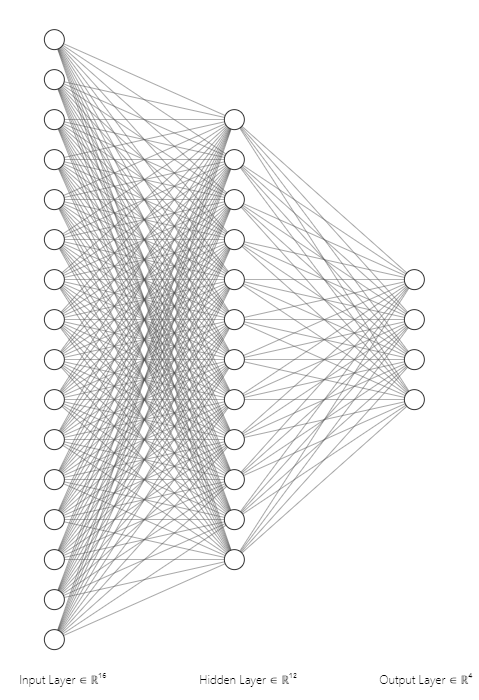

### Verificando os resultados

In [22]:
import matplotlib.pyplot as plt

In [23]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()


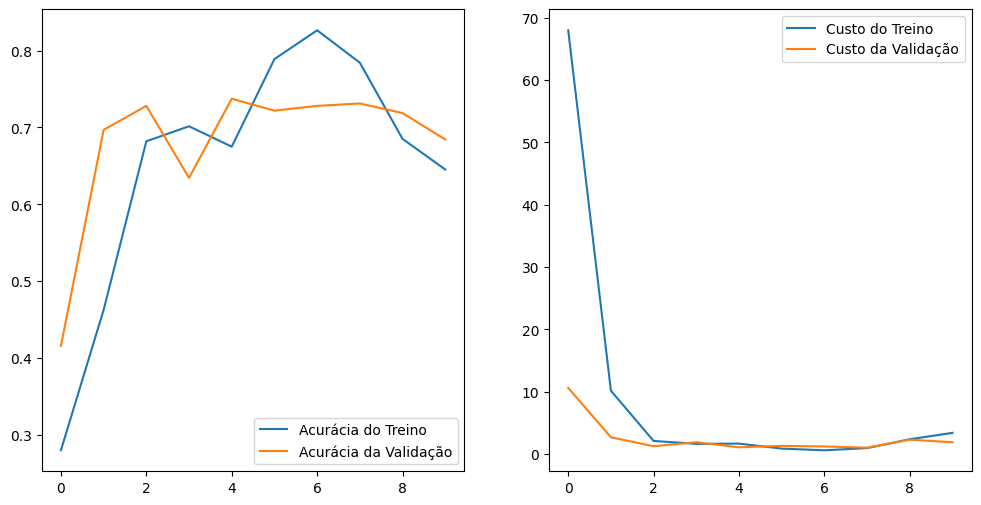

In [24]:
plota_resultados(history,epocas)

# Adicionando camadas convolucionais

### Estruturando uma rede convolucional

In [ ]:
# Criação do modelo sequencial no Keras
modelo = tf.keras.models.Sequential([

    # Camada de entrada, especificando o formato das imagens de entrada (256x256 pixels com 3 canais de cor)
    tf.keras.layers.Input(shape=(256, 256, 3)),
    
    # Camada de normalização (Rescaling) para transformar os valores dos pixels de 0-255 para 0-1
    tf.keras.layers.Rescaling(1./255),
    
    # Primeira camada convolucional com 32 filtros 3x3 e ativação ReLU
    # A camada convolucional aplica um filtro de 3x3 na imagem e ativa a função ReLU
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Camada de max pooling 2x2 para reduzir as dimensões da imagem e reter as características mais importantes
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Segunda camada convolucional com 32 filtros 3x3 e ativação ReLU
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Outra camada de max pooling 2x2 para reduzir mais a dimensão da imagem
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Camada de flatten, que transforma a saída 2D das camadas anteriores em um vetor unidimensional
    tf.keras.layers.Flatten(),
    
    # Camada densa com 128 unidades e função de ativação ReLU
    # Essa camada aprende as representações mais complexas dos dados
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    # Camada densa de saída com 4 unidades (uma para cada classe) e ativação softmax para classificação multiclasse
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

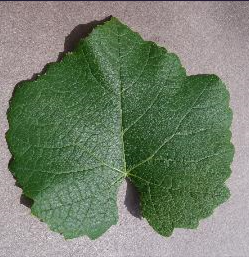

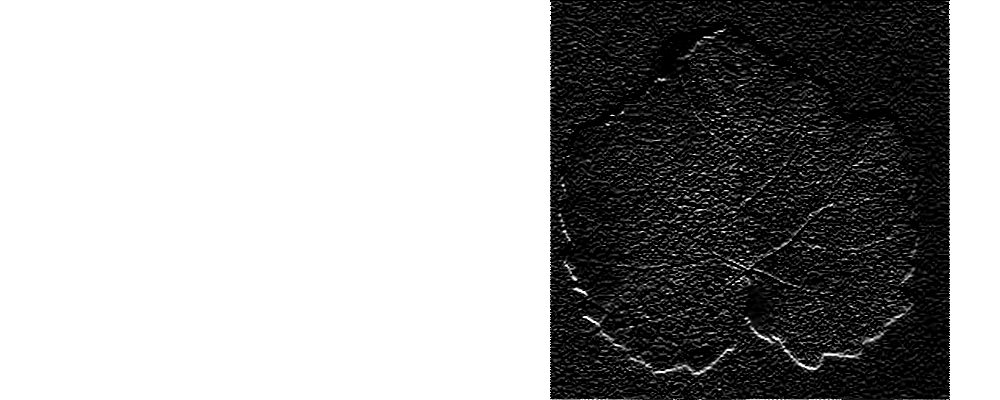

In [ ]:
# Compilação do modelo, especificando o otimizador, a função de perda e as métricas a serem monitoradas durante o treinamento
modelo.compile(
    # O otimizador 'Adam' é usado para otimização do modelo, 
    # combinando a eficiência de gradientes estocásticos com o cálculo adaptativo da taxa de aprendizado
    optimizer=tf.keras.optimizers.Adam(),  
    
    # A função de perda 'sparse_categorical_crossentropy' é adequada para problemas de classificação multiclasse
    # Ela é usada quando as classes são representadas por rótulos inteiros (sem one-hot encoding) 
    loss='sparse_categorical_crossentropy',  
    
    # A métrica 'accuracy' será monitorada durante o treinamento, indicando a taxa de acertos do modelo
    metrics=['accuracy']
)

In [27]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
20/20 [==============================] - 12s 231ms/step - loss: 2.6090 - accuracy: 0.3836 - val_loss: 0.9634 - val_accuracy: 0.4906
Epoch 2/10
20/20 [==============================] - 9s 310ms/step - loss: 0.7298 - accuracy: 0.6969 - val_loss: 0.4063 - val_accuracy: 0.8687
Epoch 3/10
20/20 [==============================] - 6s 217ms/step - loss: 0.3090 - accuracy: 0.8953 - val_loss: 0.3717 - val_accuracy: 0.8844
Epoch 4/10
20/20 [==============================] - 7s 267ms/step - loss: 0.1934 - accuracy: 0.9359 - val_loss: 0.1897 - val_accuracy: 0.9375
Epoch 5/10
20/20 [==============================] - 6s 218ms/step - loss: 0.0650 - accuracy: 0.9828 - val_loss: 0.1442 - val_accuracy: 0.9375
Epoch 6/10
20/20 [==============================] - 6s 228ms/step - loss: 0.0428 - accuracy: 0.9898 - val_loss: 0.1841 - val_accuracy: 0.9312
Epoch 7/10
20/20 [==============================] - 7s 272ms/step - loss: 0.0247 - accuracy: 0.9961 - val_loss: 0.1372 - val_accuracy: 0.9500
Epoch

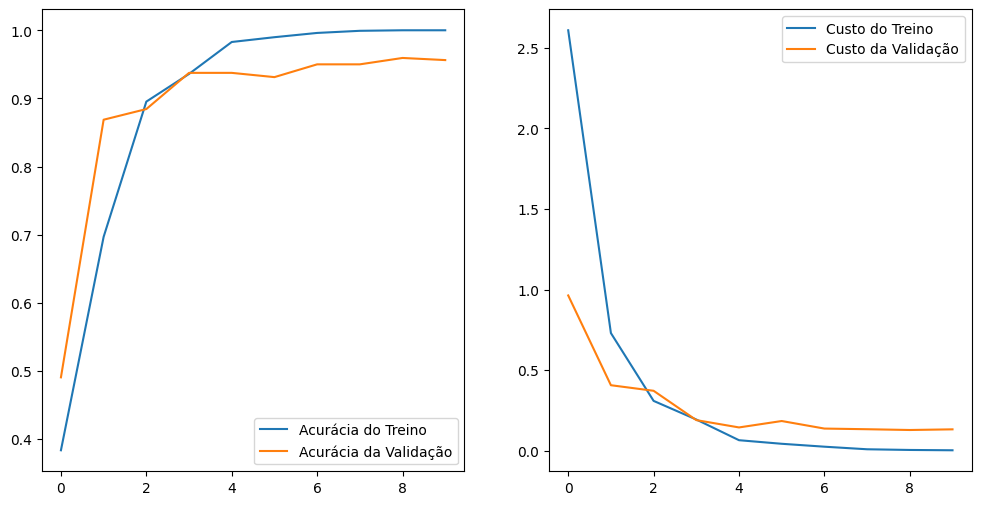

In [28]:
plota_resultados(history,epocas)

In [29]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

**Resumo**:
- **Total de parâmetros**: O modelo tem **15,755,812 parâmetros** no total.
  - **Parâmetros treináveis**: Todos os parâmetros são treináveis, ou seja, **15,755,812**.
  - **Parâmetros não treináveis**: Não há parâmetros não treináveis (`0`).
  
- **Tamanho do modelo**: Aproximadamente **60.10 MB**.

**Observações**:
- **Camadas Convolucionais**: As camadas convolucionais são responsáveis por extrair as características importantes das imagens. Elas têm menos parâmetros que as camadas densas, mas são cruciais para capturar padrões espaciais nas imagens.
- **Camada Flatten**: A camada `Flatten` ajuda a converter as saídas 2D das camadas convolucionais em um vetor 1D que pode ser passado para as camadas densas.
- **Camadas Densas**: As camadas densas são responsáveis por aprender combinações complexas das características extraídas pelas convoluções e, no final, classificar as imagens nas 4 classes possíveis.

### Parando o treinamento mais cedo

In [ ]:
# Definindo uma classe personalizada para callbacks no Keras
class myCallback(tf.keras.callbacks.Callback):
    
    # Função chamada no final de cada época de treinamento
    def on_epoch_end(self, epoch, logs={}):
        
        # Verificando se a acurácia atingiu ou superou 93%
        if(logs.get('accuracy') >= 0.93):
            # Imprime uma mensagem informando que a acurácia foi alcançada
            print("\n Alcançamos 93% de acurácia. Parando o treinamento!")
            
            # Para o treinamento do modelo
            self.model.stop_training = True

# Instanciando o callback para ser usado durante o treinamento
callbacks = myCallback()

In [ ]:
# Definindo a arquitetura do modelo sequencial
modelo = tf.keras.models.Sequential([
    
    # Camada de entrada que define o formato das imagens de entrada (256x256 pixels e 3 canais de cor)
    tf.keras.layers.Input(shape=(256, 256, 3)),
    
    # Camada de normalização que ajusta os valores dos pixels para o intervalo [0, 1]
    tf.keras.layers.Rescaling(1./255),
    
    # Primeira camada convolucional com 32 filtros 3x3 e função de ativação ReLU
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Camada de max pooling com tamanho 2x2 para reduzir as dimensões das imagens
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Segunda camada convolucional com 32 filtros 3x3 e função de ativação ReLU
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Outra camada de max pooling para redução das dimensões
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Camada de flatten, que transforma a saída 2D das camadas convolucionais em um vetor 1D
    tf.keras.layers.Flatten(),
    
    # Camada densa com 128 neurônios e função de ativação ReLU
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    # Camada de saída com 4 neurônios, correspondendo a 4 classes, usando a função de ativação softmax
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

# Compilação do modelo especificando o otimizador, função de perda e métricas
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Usando o otimizador Adam para atualização dos pesos
    loss='sparse_categorical_crossentropy',  # Função de perda para classificação multiclasse com rótulos inteiros
    metrics=['accuracy']  # Métrica de acurácia para monitorar o desempenho do modelo
)

In [32]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks]
)

Epoch 1/10
20/20 [==============================] - 7s 225ms/step - loss: 2.7089 - accuracy: 0.3914 - val_loss: 0.7140 - val_accuracy: 0.7594
Epoch 2/10
20/20 [==============================] - 7s 279ms/step - loss: 0.5286 - accuracy: 0.8164 - val_loss: 0.3345 - val_accuracy: 0.8750
Epoch 3/10
20/20 [==============================] - 7s 295ms/step - loss: 0.2418 - accuracy: 0.9117 - val_loss: 0.2484 - val_accuracy: 0.8938
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.9633
 Alcançamos 93% de acurácia. Parando o treinamento!
20/20 [==============================] - 6s 226ms/step - loss: 0.1136 - accuracy: 0.9633 - val_loss: 0.1862 - val_accuracy: 0.9219


### Aumentando a diversidade do dataset

100 épocas sem o aumento dos dados

In [33]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    # data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas =50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

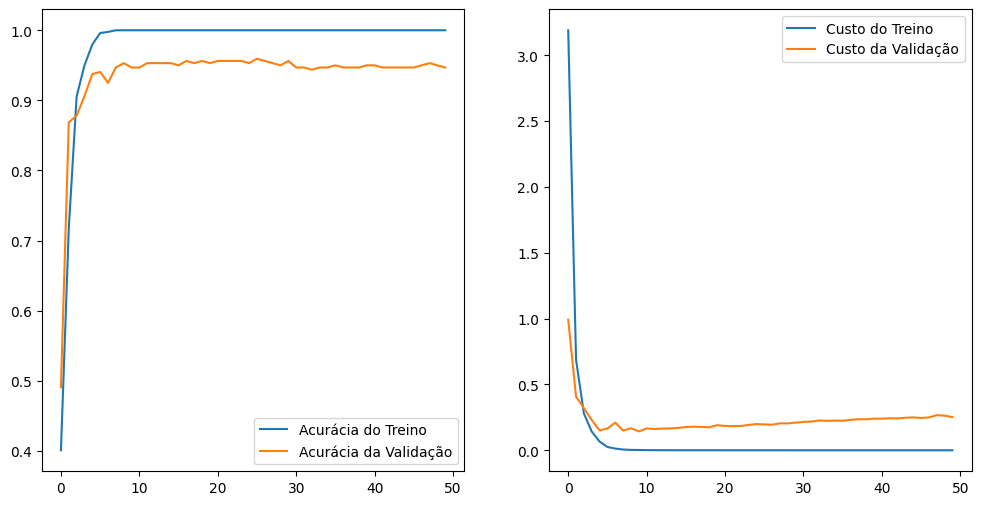

In [35]:
plota_resultados(history,epocas)

50 épocas com o aumento dos dados

In [ ]:
# Definindo uma sequência de camadas para aumento de dados (data augmentation)
data_augmentation = tf.keras.Sequential(
  [
    # Camada de aumento de dados que realiza uma inversão horizontal aleatória
    # Isso ajuda a aumentar a diversidade das imagens ao girá-las para a esquerda ou para a direita
    tf.keras.layers.RandomFlip("horizontal"),

    # Camada de rotação aleatória das imagens, com um máximo de 5% (0.05 radianos)
    # Isso permite que o modelo aprenda a ser mais robusto a pequenas rotações nas imagens
    tf.keras.layers.RandomRotation(0.05),

    # Camada de zoom aleatório nas imagens, com um fator máximo de 5% (0.05)
    # O zoom aleatório ajuda o modelo a ser mais robusto a diferentes escalas nas imagens
    tf.keras.layers.RandomZoom(0.05),
  ]
)

In [37]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas =50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

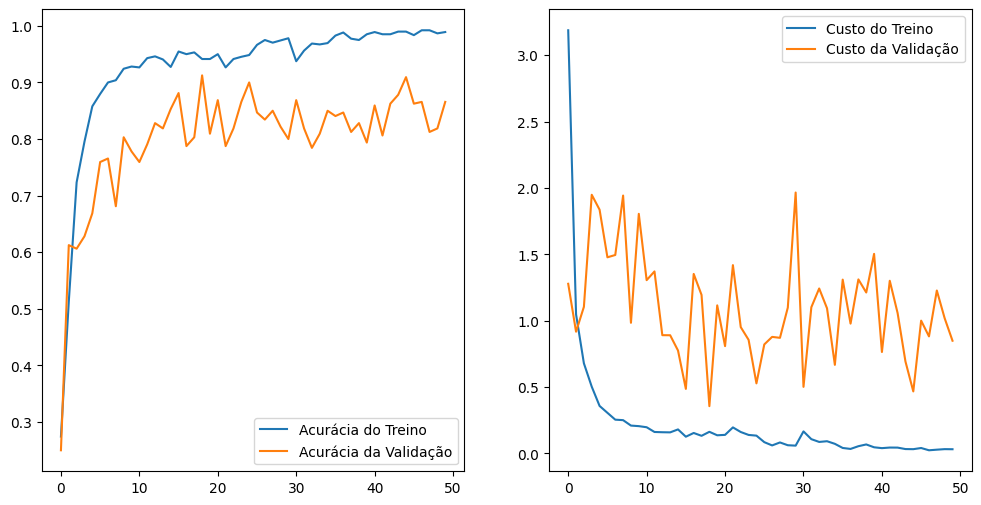

In [39]:
plota_resultados(history,epocas)

In [40]:
# Salvar o modelo
modelo.save('modelo_apos_aumento.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Aplicando modelos pré-treinados

### Usando modelos pré-treinados

In [41]:
input_shape=(256, 256, 3)

In [42]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape,include_top=False,weights='imagenet' )

87910968/87910968 [==============================] - 1s 0us/step


O modelo [InceptionV3](https://www.tensorflow.org/api_docs/python/tf/keras/applications/InceptionV3) inclui múltiplos filtros de diferentes tamanhos em cada camada, o que permite capturar padrões em várias escalas. Isso pode ser útil para garantir que todas as características relevantes das folhas sejam consideradas. No comando estou pegando os pesos obtidos com o treinamento do modelo Inception sobre a base de dados [ImageNet](https://www.image-net.org/). Ao escolher o parâmetro include_top=False, não incluir as camadas de classificação. Isso porque a maioria dos diagramas de modelos de aprendizado de máquina vai de baixo para cima.

In [43]:
modelo_base.trainable = False

In [44]:
modelo_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 127, 127, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

**Resumo do Modelo InceptionV3**:

O modelo InceptionV3 é uma arquitetura de rede neural convolucional profunda (CNN) desenvolvida para classificação de imagens. O sumário mostra os detalhes das camadas e os parâmetros do modelo. A seguir, explico cada parte:

---

**Parâmetros Totais do Modelo**:

- **Total de parâmetros**: **21,802,784** (aproximadamente 83.17 MB)
  - Este valor refere-se ao total de pesos e viéses aprendidos pelo modelo.
  
- **Parâmetros treináveis**: **0**
  - Isso significa que todos os parâmetros do modelo não são treináveis, o que é típico para modelos pré-treinados, como o InceptionV3, quando são usados com pesos congelados (por exemplo, para transferência de aprendizado). Ou seja, o modelo foi inicializado com pesos fixos e não ajustará os parâmetros durante o treinamento.
  
- **Parâmetros não treináveis**: **21,802,784** (aproximadamente 83.17 MB)
  - Esses são os pesos do modelo que não serão ajustados durante o treinamento. Esses pesos são carregados a partir de um modelo pré-treinado.

---

**Conclusão**:

O modelo InceptionV3 é uma rede convolucional profunda com muitos filtros convolucionais e camadas de normalização. Ele é frequentemente usado como um modelo pré-treinado devido ao seu grande número de parâmetros e à capacidade de aprender representações complexas das imagens. Quando usado para transferência de aprendizado, nesse caso, os parâmetros geralmente não são treinados, mas sim congelados, aproveitando os pesos pré-treinados.

### Transferindo o aprendizado

In [ ]:
# Definindo a camada de rescaling, que normaliza os valores dos pixels das imagens para o intervalo [0, 1]
rescale = tf.keras.layers.Rescaling(1./255)

# Aplicando o rescaling ao conjunto de treino
# Usei o método 'map' para aplicar a função lambda a cada item do conjunto de dados.
# A função lambda pega a imagem (x) e o rótulo (y), e aplica a normalização nos valores da imagem (x), sem alterar o rótulo (y)
treino = treino.map(lambda x, y: (rescale(x), y))

# Aplicando o rescaling ao conjunto de validação da mesma forma que no treino
validacao = validacao.map(lambda x, y: (rescale(x), y))

In [ ]:
# Obtendo a camada chamada 'mixed7' do modelo base
# O modelo base é um modelo pré-treinado, e 'mixed7' é o nome de uma camada interna no modelo.
ultima_camada = modelo_base.get_layer('mixed7')

# Exibindo o tamanho da saída dessa camada, ou seja, a forma do tensor que ela gera
# Isso é útil para entender as dimensões das características extraídas antes de aplicar outras camadas
print('tamanho da última camada: ', ultima_camada.output_shape)

# Pegando a saída da última camada (mixed7) e armazenando na variável 'ultima_saida'
# Essa variável agora contém as ativações (ou representações) dessa camada específica, que podem ser usadas em camadas posteriores
ultima_saida = ultima_camada.output

tamanho da última camada:  (None, 14, 14, 768)


In [ ]:
# Primeiramente, a saída da camada 'mixed7' (armazenada em 'ultima_saida') é achatada em um vetor unidimensional
# A camada 'Flatten' transforma a saída em uma dimensão de 1D, que é necessária para ser alimentada nas camadas densas
x = tf.keras.layers.Flatten()(ultima_saida)

# Em seguida, adiciona-se uma camada densa com 1024 neurônios e função de ativação ReLU (Rectified Linear Unit)
# A função de ativação ReLU é uma escolha comum, pois ajuda a introduzir não-linearidade, tornando o modelo mais expressivo
x = tf.keras.layers.Dense(1024, activation='relu')(x)

# Após a camada densa, aplica-se a regularização com Dropout de 20% (0.2)
# O Dropout ajuda a prevenir o sobreajuste, desligando aleatoriamente 20% dos neurônios durante o treinamento
x = tf.keras.layers.Dropout(0.2)(x)

# Adiciona-se a camada final densa com 4 neurônios e função de ativação Softmax
# Como estamos lidando com um problema de classificação multiclasse, a ativação Softmax vai gerar probabilidades
# para cada uma das 4 classes, sendo útil para classificar a entrada em uma das 4 categorias
x = tf.keras.layers.Dense(4, activation=tf.nn.softmax)(x)

# Finalmente, criamos o modelo, especificando a entrada (modelo_base.input) e a saída (a saída da camada final 'x')
# Isso define a arquitetura do novo modelo, usando a base do modelo pré-treinado e adicionando camadas extras para a tarefa
modelo = tf.keras.Model(inputs=modelo_base.input, outputs=x)

In [48]:
modelo.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 127, 127, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

**O que isso significa?**

- **Total de parâmetros**: O modelo tem um grande número de parâmetros, indicando que ele possui uma rede profunda, com muitas camadas convolucionais e filtros. Isso sugere que ele é capaz de aprender representações complexas de dados, mas também exige um poder computacional considerável.
  
- **Parâmetros treináveis vs não treináveis**:
  - A grande maioria dos parâmetros são **treináveis** (154,145,796), o que significa que durante o treinamento, o modelo ajustará esses parâmetros para melhorar suas previsões.
  - Há também **parâmetros não treináveis** (8,975,264), o que pode indicar que parte do modelo (talvez camadas de um modelo pré-treinado) está sendo congelada, ou seja, não está sendo ajustada durante o treinamento.

- **Estrutura do modelo**: O modelo tem várias camadas convolucionais seguidas por camadas de normalização e ativação, o que é típico em redes neurais convolucionais (CNNs) para extração de características. Essas camadas são usadas para processar imagens e aprender representações hierárquicas e complexas dos dados de entrada.

In [49]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas =20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

### Salvando o modelo

In [51]:
#modelo.save('meu_modelo.h5')

 Opções de salvamento - modelo completo, apenas pesos, apenas arquitetura

In [52]:
modelo.save('modelo_transferencia_de_aprendizado.h5')

In [53]:
modelo.save('modelo_final_transferencia_de_aprendizado.h5', include_optimizer=False)

In [ ]:
modelo.save_weights('pesos.h5')

Comprimir o modelo

In [ ]:
# A classe TFLiteConverter é usada para converter modelos treinados no TensorFlow (Keras) para o formato TensorFlow Lite (TFLite).
# Permite otimizar o modelo para ser executado em dispositivos móveis, IoT, entre outros dispositivos com capacidade de processamento reduzida.

converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

In [ ]:
# O parâmetro 'tf.lite.Optimize.DEFAULT' permite que o TensorFlow Lite aplique uma otimização padrão ao modelo.
# Isso pode incluir, por exemplo, quantização de pesos, que pode reduzir o tamanho do modelo e melhorar a velocidade de inferência.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# O 'float16' usa metade da memória que o 'float32' (padrão do TensorFlow) e pode resultar em uma aceleração da inferência,
# especialmente em dispositivos que possuem suporte para cálculos de precisão reduzida (como alguns GPUs ou NPUs).
# Isso é útil em dispositivos com recursos limitados, pois resulta em um modelo mais compacto e rápido.
converter.target_spec.supported_types = [tf.float16]


In [57]:
modelo_tflite_quantizado = converter.convert()

In [58]:
# Salvar o modelo TFLite quantizado
with open('modelo_quantizado16bits.tflite', 'wb') as f:
    f.write(modelo_tflite_quantizado)